# 简单的线性回归模型
基于 TensorFlow 2.0，使用 Keras 自定义模型。

In [1]:
import tensorflow as tf

In [2]:
X = tf.constant([[3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]], shape=(17, 1))
y = tf.constant([[1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]], shape=(17, 1))

## 定义模型
定义最简单的 y = a * X + b 模型。   
使用 Keras，定义只有一个节点的一层 dense 即可。

In [3]:
class Linear(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(
            units=1,
            activation=None,
            kernel_initializer=tf.zeros_initializer(),
            bias_initializer=tf.zeros_initializer()
        )

    def call(self, input):
        output = self.dense(input)
        return output

## 模型训练

In [4]:
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X)  
        loss = tf.reduce_mean(tf.square(y_pred - y))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
print(model.variables)

[<tf.Variable 'linear/dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.33442247]], dtype=float32)>, <tf.Variable 'linear/dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.2118748], dtype=float32)>]


## 模型可视化

In [5]:
import numpy as np
import matplotlib.pyplot as plt

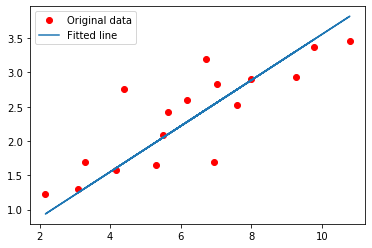

In [6]:
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, model(X), label='Fitted line')
plt.legend()
plt.show()